# Exercise: Kinetic Reaction Order

This python script can be used to determine the reaction order from kinetic data by inspecting plots of $c$, $\log(c)$ and $c^{-1}$ as a function of time. Note that it is possible to insert YouTube videos, images, and $\LaTeX$ math!

## Usage

On lines 30 and 31 two lists are defined, time and conc. Enter experimental data into these arrays and run the script. You need to have matplotlib installed or run the script via a portal.

In [1]:
# import some python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np  # used for handling arrays and matrices
from IPython.display import YouTubeVideo  # used to display vides and other goodies
from ipywidgets import interact
from scipy.integrate import odeint
from scipy import optimize

## Background information

Insert here theory and background information which could include images and $\LaTeX$ math. In the cell below, we import a YouTube video.

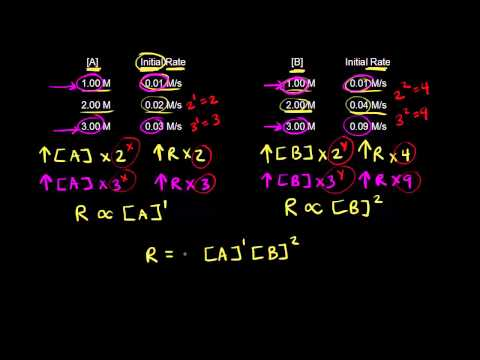

In [2]:
YouTubeVideo("6Ng8ayarWHw")

length of list time is 11
Length of list conc is 11


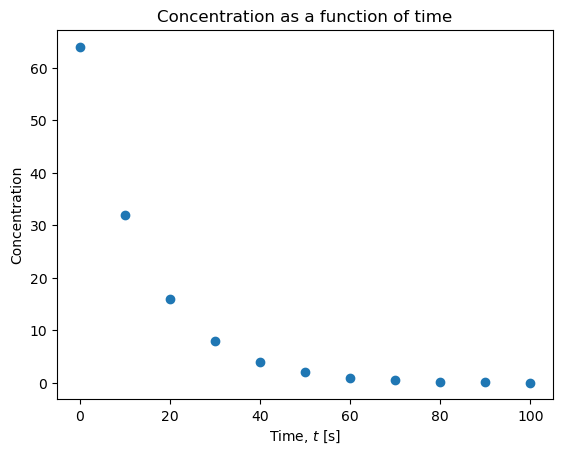

In [3]:
# Edit here: set times and concentrations for the reaction.

time = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
conc = np.array([64, 32, 16, 8, 4, 2, 1, 0.5, 0.25, 0.125, 0.0625])

print("length of list time is {}".format(len(time)))
print("Length of list conc is {}".format(len(conc)))

if len(time) != len(conc):
    raise Exception("Lists time and conc are of different lengths")

# Plot concentration versus time.
plt.plot(time, conc, "o")
plt.title("Concentration as a function of time")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Concentration")
plt.show()

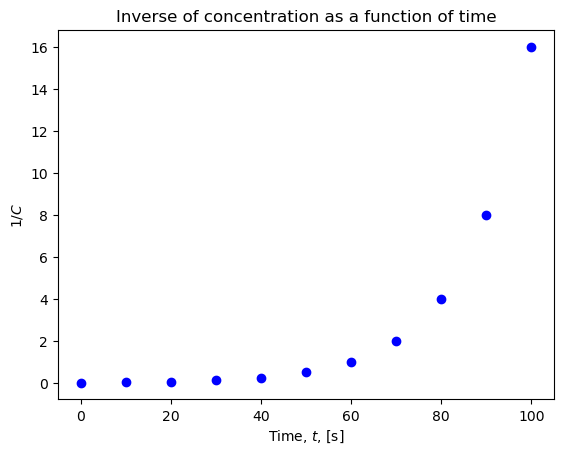

In [4]:
# Plot inverse concentration versus time.
plt.plot(time, 1.0 / conc, "o", color="blue")
plt.title("Inverse of concentration as a function of time")
plt.xlabel("Time, $t$, [s]")
plt.ylabel("$1/C$")
plt.show()

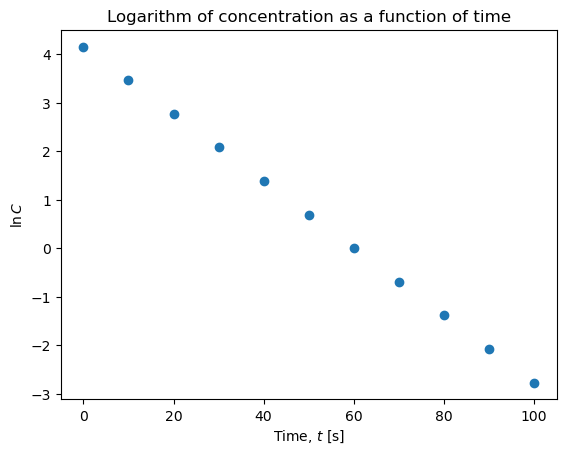

In [5]:
# Plot the logarithm of the concentration versus time.
plt.plot(time, np.log(conc), "o")
plt.title("Logarithm of concentration as a function of time")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("$\ln {C}$")
plt.show()

## Rate constant, $k$, determination

### Part 1: Graphically

You will now determine the slope, $\frac{d\ln C}{dt}$ using your eyes to do a manual curve fit. This is similar to the old style way of plotting on paper, then determine the slope using a ruler.

1. Adjust the sliders below to best overlay the dashed straight line over the experimental points.
1. What are the units of the slope and offset, respectively? That is $a$ and $b$.

In [6]:
def plot_function(a=0.04, b=2):
    """this function is being called everytime you update the sliders below"""
    plt.plot(time, np.log(conc), "o", label="experiment")
    plt.plot(time, a * time + b, "--", label="straight line")
    plt.legend(loc=3, frameon=False)


i = interact(
    plot_function,
    a=(-0.5, 0.2, 0.01),
    b=(-3, 10, 0.2),
    p0B=(0, 1, 0.1),
    continuous_update=False,
)
i.widget.children[0].description = r"slope (a)"
i.widget.children[1].description = r"offset (b)"

interactive(children=(FloatSlider(value=0.04, description='a', max=0.2, min=-0.5, step=0.01), FloatSlider(valu…

### Part 2: Curve fitting

In the exercise above you used a straight line to determine the rate constant by "manual" curve fitting. For computers it is very easy to perform (non-linear) curve fitting which will be much more accurate. Below we use a standard python module that performs a _least squares fit_:

In [7]:
# fit lnC vs. time to linear function
optimize.curve_fit(lambda t, a, b: a * t + b, time, np.log(conc))[0]

array([-0.06931472,  4.15888308])

### Part 3: Numerical solution to differential equation

We could also just skip all the tricks and numerically solve the initial differential equation $-\frac{d[A]}{dt} = k[A]$ directly. Again, for a computer this is trivial:

In [8]:
print("rate constant =", odeint(lambda C, k: -C * k, conc, time)[0][-1])

rate constant = 0.0625
